# Smart Traffic Light Optimization using Machine Learning
  Optimize Signal Timing using Traffic Density and Pattern Analysis  

## Problem Statement
Traffic congestion is a major issue in modern cities, caused mainly by inefficient traffic signal timing.
Traditional traffic light systems work on fixed time intervals, regardless of the number of vehicles on the road, leading to long waiting times and fuel wastage.

This project aims to develop a machine learning–based model that can dynamically predict the optimal green light duration for each lane based on traffic density, average speed, congestion level, and time of day.

## Objectives  
- To analyze traffic density and flow patterns using machine learning.  
- To predict dynamic signal timings for each lane.  
- To reduce congestion and vehicle idle time at intersections.  
- To improve traffic efficiency and fuel economy.  


## Models Used

Linear Regression (LR)

Decision Tree Regressor (DT)

Random Forest Regressor (RF)

Support Vector Regressor (SVR)

In [5]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#load data 
traffic_data = pd.read_csv("smart_traffic_management_dataset.csv")
traffic_data

,timestamp,location_id,traffic_volume,avg_vehicle_speed,vehicle_count_cars,vehicle_count_trucks,vehicle_count_bikes,weather_condition,temperature,humidity,accident_reported,signal_status
0,2024-01-01 00:00:00,4,504,53.124162,142,24,44,Cloudy,33.334387,36.390698,0,Red
1,2024-01-01 00:01:00,5,209,44.947850,862,50,23,Cloudy,17.926830,37.640927,0,Green
2,2024-01-01 00:02:00,3,572,63.179229,317,12,10,Windy,33.483375,84.262610,1,Red
3,2024-01-01 00:03:00,5,699,42.269697,709,43,21,Sunny,19.212941,61.550978,0,Yellow
4,2024-01-01 00:04:00,5,639,72.185791,594,34,14,Cloudy,11.349244,77.494506,0,Red
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2024-01-02 09:15:00,1,922,71.580775,405,78,48,Cloudy,23.524313,84.628298,1,Red
1996,2024-01-02 09:16:00,5,941,77.568331,81,12,29,Rainy,32.308462,60.169011,1,Yellow
1997,2024-01-02 09:17:00,1,504,33.062751,534,65,30,Windy,26.999638,46.140836,0,Green
1998,2024-01-02 09:18:00,5,62,25.289129,449,18,27,Foggy,27.999731,65.907705,0,Red


In [7]:
traffic_data.isnull().sum()

timestamp               0
location_id             0
traffic_volume          0
avg_vehicle_speed       0
vehicle_count_cars      0
vehicle_count_trucks    0
vehicle_count_bikes     0
weather_condition       0
temperature             0
humidity                0
accident_reported       0
signal_status           0
dtype: int64

In [8]:
traffic_data.columns

Index(['timestamp', 'location_id', 'traffic_volume', 'avg_vehicle_speed',
       'vehicle_count_cars', 'vehicle_count_trucks', 'vehicle_count_bikes',
       'weather_condition', 'temperature', 'humidity', 'accident_reported',
       'signal_status'],
      dtype='object')

In [9]:
accidents_by_weather = traffic_data.groupby("weather_condition")["accident_reported"].mean()
accidents_by_weather

weather_condition
Cloudy    0.054245
Foggy     0.042895
Rainy     0.067183
Sunny     0.047619
Windy     0.057078
Name: accident_reported, dtype: float64

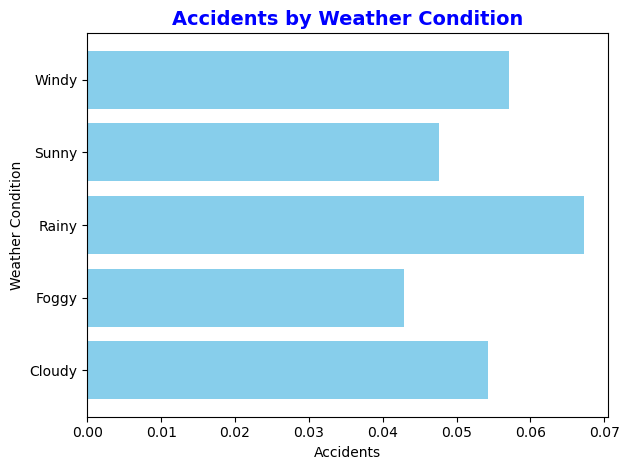

In [10]:
plt.barh(accidents_by_weather.index,accidents_by_weather.values,color = "skyblue")
plt.title("Accidents by Weather Condition",fontsize=14, fontweight='bold',color = "blue")
plt.xlabel("Accidents")
plt.ylabel("Weather Condition")
plt.tight_layout()

plt.show()

In [11]:
#traffic_data['timestamp'] = pd.to_datetime(traffic_data['timestamp'])
#traffic_data['hour'] = traffic_data['timestamp'].dt.hour

In [12]:
traffic_data['timestamp'] = pd.to_datetime(traffic_data['timestamp'])

traffic_data['hour'] = traffic_data['timestamp'].dt.hour
traffic_data['dayofweek'] = traffic_data['timestamp'].dt.dayofweek
traffic_data['month'] = traffic_data['timestamp'].dt.month

# finally drop timestamp
traffic_data = traffic_data.drop(columns=['timestamp'])



In [13]:
avg_volume = traffic_data.groupby('hour')['traffic_volume'].mean()

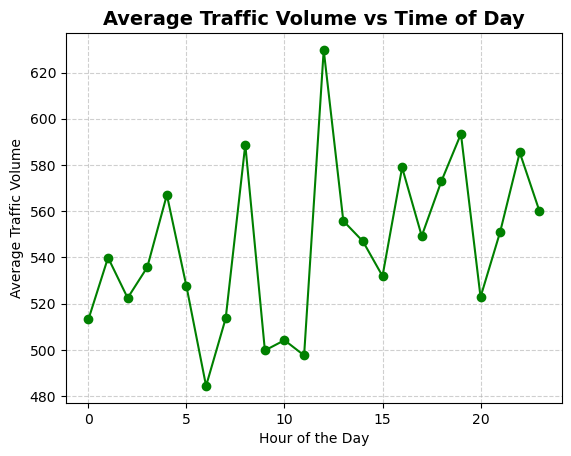

In [14]:
plt.plot(avg_volume.index, avg_volume.values, color='green', marker='o')
plt.title("Average Traffic Volume vs Time of Day", fontsize=14, fontweight='bold')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Traffic Volume")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

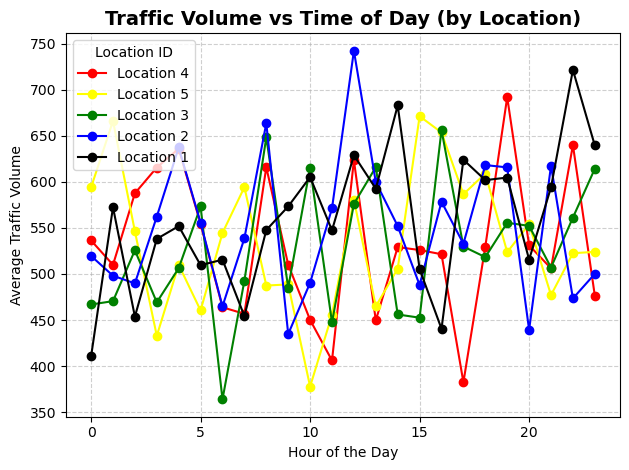

In [15]:

locations = traffic_data['location_id'].unique()
colors = ["red", "yellow", "green", "blue", "black", "brown", "pink"]

# Plot for each location
for loc, color in zip(locations, colors):
    hourly_avg = traffic_data[traffic_data["location_id"] == loc].groupby("hour")["traffic_volume"].mean()
    plt.plot(hourly_avg.index, hourly_avg.values, label=f"Location {loc}", color=color, marker="o")

# Chart formatting
plt.title("Traffic Volume vs Time of Day (by Location)", fontsize=14, fontweight='bold')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Traffic Volume")
plt.legend(title="Location ID")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
col = ("weather_condition","signal_status")
for i in col:
    traffic_data[i] = le.fit_transform(traffic_data[i])
traffic_data

,location_id,traffic_volume,avg_vehicle_speed,vehicle_count_cars,vehicle_count_trucks,vehicle_count_bikes,weather_condition,temperature,humidity,accident_reported,signal_status,hour,dayofweek,month
0,4,504,53.124162,142,24,44,0,33.334387,36.390698,0,1,0,0,1
1,5,209,44.947850,862,50,23,0,17.926830,37.640927,0,0,0,0,1
2,3,572,63.179229,317,12,10,4,33.483375,84.262610,1,1,0,0,1
3,5,699,42.269697,709,43,21,3,19.212941,61.550978,0,2,0,0,1
4,5,639,72.185791,594,34,14,0,11.349244,77.494506,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,922,71.580775,405,78,48,0,23.524313,84.628298,1,1,9,1,1
1996,5,941,77.568331,81,12,29,2,32.308462,60.169011,1,2,9,1,1
1997,1,504,33.062751,534,65,30,4,26.999638,46.140836,0,0,9,1,1
1998,5,62,25.289129,449,18,27,1,27.999731,65.907705,0,1,9,1,1


traffic_data.drop('timestamp', axis=1, inplace=True)
#traffic_data['hour'] = pd.to_datetime(traffic_data['timestamp']).dt.hour


In [19]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
Min = MinMaxScaler()

In [20]:
num = traffic_data.select_dtypes(include = ["number"]).columns
traffic_data[num] = Min.fit_transform(traffic_data[num])
traffic_data

,location_id,traffic_volume,avg_vehicle_speed,vehicle_count_cars,vehicle_count_trucks,vehicle_count_bikes,weather_condition,temperature,humidity,accident_reported,signal_status,hour,dayofweek,month
0,0.75,0.478903,0.552238,0.138794,0.242424,0.897959,0.00,0.933648,0.106425,0.0,0.5,0.000000,0.0,0.0
1,1.00,0.167722,0.415878,0.957907,0.505051,0.469388,0.00,0.316490,0.127269,0.0,0.0,0.000000,0.0,0.0
2,0.50,0.550633,0.719930,0.337884,0.121212,0.204082,1.00,0.939616,0.904531,1.0,0.5,0.000000,0.0,0.0
3,1.00,0.684599,0.371214,0.783845,0.434343,0.428571,0.75,0.368006,0.525890,0.0,1.0,0.000000,0.0,0.0
4,1.00,0.621308,0.870136,0.653015,0.343434,0.285714,0.00,0.053021,0.791695,0.0,0.5,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.00,0.919831,0.860046,0.437998,0.787879,0.979592,0.00,0.540700,0.910628,1.0,0.5,0.391304,1.0,0.0
1996,1.00,0.939873,0.959902,0.069397,0.121212,0.591837,0.50,0.892554,0.502850,1.0,1.0,0.391304,1.0,0.0
1997,0.00,0.478903,0.217666,0.584755,0.656566,0.612245,1.00,0.679906,0.268976,0.0,0.0,0.391304,1.0,0.0
1998,1.00,0.012658,0.088022,0.488055,0.181818,0.551020,0.25,0.719965,0.598524,0.0,0.5,0.391304,1.0,0.0


In [21]:
traffic_data["signal_status"].value_counts()

signal_status
1.0    708
0.5    683
0.0    609
Name: count, dtype: int64

In [22]:
x = traffic_data.drop("signal_status",axis = 1)
y = traffic_data["signal_status"]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.8)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)


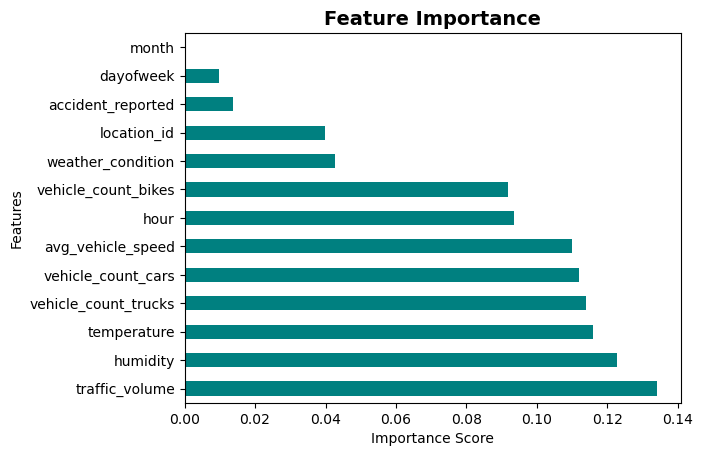

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
imp = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)
imp.plot(kind='barh', color='teal')
plt.title('Feature Importance', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(x_train,y_train)

LinearRegression()

In [30]:
pred_lr = lr.predict(x_test)

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [32]:
print("Mean Squared Error:",mean_squared_error(pred_lr,y_test))
print("Mean Absolute Error:",mean_absolute_error(pred_lr,y_test))
print("r2 Score:",r2_score(pred_lr,y_test))

Mean Squared Error: 0.17213555555771382
Mean Absolute Error: 0.3557285221169208
r2 Score: -15.290043294677421


In [33]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [34]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [35]:
dt_pred = dt.predict(x_test)

In [36]:
print("Mean Squared Error:",mean_squared_error(dt_pred,y_test))
print("Mean Absolute Error:",mean_absolute_error(dt_pred,y_test))
print("r2 Score:",r2_score(dt_pred,y_test))

Mean Squared Error: 0.3390625
Mean Absolute Error: 0.446875
r2 Score: -0.9720146583393727


In [37]:
from sklearn.ensemble import RandomForestRegressor
r_f = RandomForestRegressor()
r_f.fit(x_train,y_train)

RandomForestRegressor()

In [38]:
rf_pred = r_f.predict(x_test)

In [39]:
s2 = mean_squared_error(rf_pred,y_test)
a2 = mean_absolute_error(rf_pred,y_test)
r2 = r2_score(rf_pred,y_test)

In [40]:
print("Mean Squared Error:",s2)
print("Mean absolute Error:",a2)
print("r2 score:",r2)

Mean Squared Error: 0.17647767187500002
Mean absolute Error: 0.35965312499999996
r2 score: -11.34204634334553


In [41]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [42]:
svr_pred = svr.predict(x_test)

In [43]:
print("Mean Squared Error:",mean_squared_error(svr_pred,y_test))
print("Mean Absolute Error:",mean_absolute_error(svr_pred,y_test))
print("r2 Score:",r2_score(svr_pred,y_test))

Mean Squared Error: 0.21632893480278825
Mean Absolute Error: 0.39097198394210186
r2 Score: -3.4991090942028427


<Axes: >

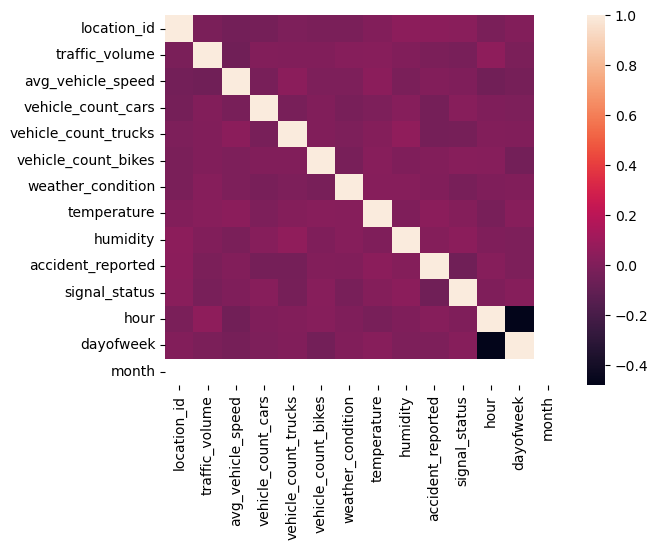

In [91]:
import seaborn as sns
sns.heatmap(traffic_data.corr(), annot=False)


# Final Model Selection

Although all models produced negative R² scores due to dataset limitations, the Decision Tree had the R² value closest to 0, meaning it performed the most consistently among the four.
Therefore, the Decision Tree Regressor is selected as the final model.

# Future Scope

Performance can be improved significantly with more traffic data.

Real-time camera or IoT sensor inputs can be added for better prediction accuracy.